# Loan Default Prediction -  part 2 Feature Engineering

_by Yidan Nie_

# Goal of this part:
__* Data quality checking__
- Duplicates, Missing values, Cardinality, Errors

__* Feature Engineering__
- Conversions of Categorial Variables and Imputation
- One-hot Encoding, Bucketing

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Check-duplicates" data-toc-modified-id="Check-duplicates-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Check duplicates</a></span></li><li><span><a href="#Check-Missing-Values" data-toc-modified-id="Check-Missing-Values-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Check Missing Values</a></span></li><li><span><a href="#Check-Cardinality" data-toc-modified-id="Check-Cardinality-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Check Cardinality</a></span></li><li><span><a href="#Whar-I-find:" data-toc-modified-id="Whar-I-find:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Whar I find:</a></span></li><li><span><a href="#Split-the-data" data-toc-modified-id="Split-the-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Split the data</a></span></li><li><span><a href="#Conversion-and-Imputation" data-toc-modified-id="Conversion-and-Imputation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conversion and Imputation</a></span><ul class="toc-item"><li><span><a href="#features-with-missing-values" data-toc-modified-id="features-with-missing-values-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>features with missing values</a></span></li><li><span><a href="#Conversion" data-toc-modified-id="Conversion-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Conversion</a></span><ul class="toc-item"><li><span><a href="#generate-new-variable-about-fico-score" data-toc-modified-id="generate-new-variable-about-fico-score-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>generate new variable about fico score</a></span></li><li><span><a href="#convert-data-type-of-columns" data-toc-modified-id="convert-data-type-of-columns-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>convert data type of columns</a></span></li><li><span><a href="#time-related-feature-conversion" data-toc-modified-id="time-related-feature-conversion-6.2.3"><span class="toc-item-num">6.2.3&nbsp;&nbsp;</span>time-related feature conversion</a></span></li></ul></li><li><span><a href="#Drop" data-toc-modified-id="Drop-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Drop</a></span></li><li><span><a href="#One-hot-encoding" data-toc-modified-id="One-hot-encoding-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>One-hot encoding</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

Load the data

In [69]:
data = pd.read_csv('data1.csv')
meta = pd.read_csv('meta_data.csv')

In [70]:
data = data.drop(data.columns[0],axis = 1)
data.head()

,id,loan_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,earliest_cr_line,fico_range_low,fico_range_high,acc_now_delinq,delinq_amnt,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,inq_last_6mths,inq_last_12m
0,54027458,14000,36 months,439.88,5 years,RENT,50000.0,Source Verified,Jul-15,0,...,Oct-96,725,729,0,0,0,NaN,42.0,0,NaN
1,72594974,7500,36 months,252.67,3 years,MORTGAGE,68000.0,Not Verified,Feb-16,0,...,Nov-00,660,664,0,0,0,NaN,NaN,2,5.0
2,71061534,25000,36 months,870.44,5 years,RENT,55000.0,Verified,Feb-16,0,...,Mar-08,755,759,0,0,0,NaN,NaN,1,3.0
3,54474095,12000,36 months,382.55,5 years,RENT,30000.0,Not Verified,Jul-15,0,...,Nov-10,730,734,0,0,0,NaN,NaN,0,NaN
4,45704513,30000,60 months,677.85,10+ years,RENT,84000.0,Verified,Apr-15,0,...,Mar-01,720,724,0,0,0,NaN,NaN,0,NaN


In [71]:
meta.set_index('var_name', inplace=True)

In [72]:
meta.head()

,role,var_type,keep,dtype
var_name,,,,
id,id,ordinal,False,int64
loan_amnt,input,interval,True,int64
term,input,binary,True,object
installment,input,interval,True,float64
emp_length,input,nominal,True,object


# Data quality checking

## Check duplicates

In [50]:
def CheckDuplicates(data):
    before = data['id'].nunique()
    after = len(data.id)
    if before == after:
        print( 'There is no duplicated entry based on id number.')
    else:
        print( 'There is',(after-before), 'duplicates based on id number.')

CheckDuplicates(data=data)
    

There is no duplicated entry based on id number.


## Check Missing Values

In [51]:
def CheckMissings(data):
    
    global vars_with_missing
    vars_with_missing = []

    for f in data.columns:
        missings = data[data[f].isnull()][f].shape[0]
        if missings > 0:
            vars_with_missing.append(f)
            missings_perc = missings/data.shape[0]
            print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))

CheckMissings(data=data)

Variable emp_length has 1005 records (5.72%) with missing values
Variable mths_since_last_delinq has 8326 records (47.38%) with missing values
Variable mths_since_last_record has 14171 records (80.65%) with missing values
Variable inq_last_12m has 12970 records (73.81%) with missing values


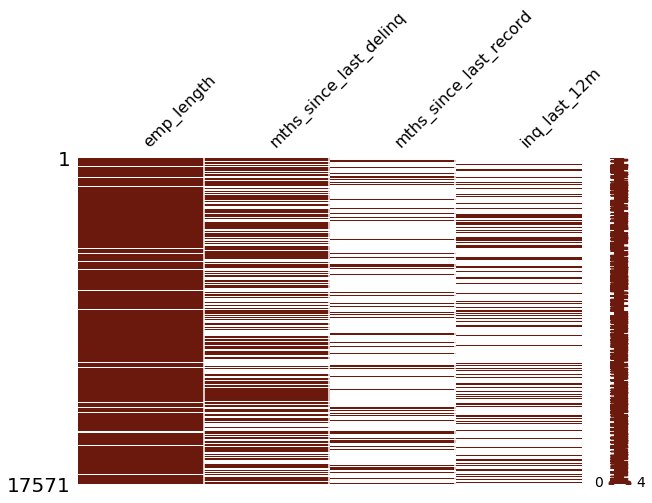

In [19]:
import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=data.loc[:,vars_with_missing], figsize=(10, 6), color=(0.42, 0.1, 0.05))

## Check Cardinality
* Cardinality refers to the number of different values in a variable. If there are variables with many distinct values, we should handle these variables differently as they would result in too many dummy variables.

In [27]:
def CheckCardinality(data,col):
    for f in col:
        dist_values = data[f].value_counts().shape[0]
        print('Variable {} has {} distinct values'.format(f, dist_values));
        
v = meta[(meta.var_type == 'nominal') & (meta.keep)].index
CheckCardinality(data=data,col=v)

Variable emp_length has 11 distinct values
Variable home_ownership has 3 distinct values
Variable verification_status has 3 distinct values
Variable issue_d has 21 distinct values
Variable purpose has 13 distinct values
Variable addr_state has 50 distinct values
Variable earliest_cr_line has 548 distinct values


## Whar I find:
_Duplicates_
* No duplicate

_Errors_
* One row has annual income as 0 and dti as 9999. I think there would be some errors in the process of data entry since applicant with no income is no chance to get a loan.

_Missing Values_
* There are 4 variables have missing values

_Cardinality_
* Except for home_ownership and verification_status, other variales have too many distinct values, which leads to some feature engineering based on insghts from EDA.

# Feature engineering

## Split the data

In [116]:
# Drop one row with error
#for one record, its annual_inc is 0 and dti is 9999, which is an outlier, just drop it
row_to_drop = data[data['annual_inc'] == 0].index
data.drop(row_to_drop, inplace=True, axis=0)

In [117]:
y = data['loan_status']
x = data.drop(['id','loan_status'], axis=1)

#split into train/test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)
print("x_test.shape:", x_test.shape)
print("y_test.shape:", y_test.shape)

x_train.shape: (14056, 21)
y_train.shape: (14056,)
x_test.shape: (3514, 21)
y_test.shape: (3514,)


In [74]:
#check distribution of the label column in both data sets
train_dist = y_train.value_counts()
test_dist = y_test.value_counts()

print('In training data set, non_default class is',round(train_dist[0]/train_dist[1],1),'times more than the default class')
print('In testing data set, non-default class is',round(test_dist[0]/test_dist[1],1),'times more than the default class')


In training data set, non_default class is 1.9 times more than the default class
In testing data set, non-default class is 2.0 times more than the default class


* Spliting training and testing data sets before feature engineering to avoid data leakage;
* the distribution of target value is relatively identical in both training and testing data set.

## Conversion and Imputation

### features with missing values

In [118]:
#emp_length
#create bins
def emp_length_conversion(s):
    if pd.isnull(s):
        return 'missing'
    elif s=="< 1 year" or s=="1 year" :
        return '<= 1 year'
    elif s=='10+ years':
        return s
    else:
        return '2-9 years'


x_train['emp_length'] = x_train['emp_length'].apply(emp_length_conversion)
x_test['emp_length'] = x_test['emp_length'].apply(emp_length_conversion)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [119]:
#mths_since_last_delinq
#encode NAN as 150
def mths_since_last_delinq_conversion(s):
    if pd.isnull(s):
        #return a value that never appears in this column
        return 150
    else:
        return s;

x_train['mths_since_last_delinq'] = x_train['mths_since_last_delinq'].apply(mths_since_last_delinq_conversion)
x_test['mths_since_last_delinq'] = x_test['mths_since_last_delinq'].apply(mths_since_last_delinq_conversion)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [120]:
#mths_since_last_record


#drop and if missing encode 1 for new feature 'lastrecord_missing'
x_train.insert(18, 'lastrecord_missing', 0)

x_train['lastrecord_missing'] = x_train['mths_since_last_record'].isnull().astype(int)


#drop and if missing encode 1 for new feature 'lastrecord_missing'
x_test.insert(18, 'lastrecord_missing', 0)

x_test['lastrecord_missing'] = x_test['mths_since_last_record'].isnull().astype(int)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [121]:
# Drop the variables with more than 73.8% of missing values
vars_to_drop = ['inq_last_12m','mths_since_last_record']
x_train=x_train.drop(vars_to_drop, axis=1)
x_test=x_test.drop(vars_to_drop,axis=1)
# Updating the meta
meta.loc[(vars_to_drop),'keep'] = False  

### Conversion

#### generate new variable about fico score

In [122]:
#convert 'fico_range_?' into 'fico_score'
def fico_conversion(data):
    data['fico_score'] = (data['fico_range_low'] + data['fico_range_high'])/2
    data.drop(['fico_range_low', 'fico_range_high'], inplace=True, axis=1)
    
fico_conversion(x_train)
fico_conversion(x_test)

# Updating the meta
vars_to_drop = ['fico_range_low', 'fico_range_high']
meta.loc[(vars_to_drop),'keep'] = False  

#### convert data type of columns

In [123]:
#acc_now_delinq
x_train['acc_now_delinq']=x_train['acc_now_delinq'].apply(str)
#term
x_train['term'] = (x_train.term == '36 months').astype(int)

#acc_now_delinq
x_test['acc_now_delinq']=x_test['acc_now_delinq'].apply(str)
#term
x_test['term'] = (x_test.term == '36 months').astype(int)

#### time-related feature conversion

In [124]:
#earliest_cr_line and issue_d

x_train['month_earliest_cr_line'] = (pd.to_datetime(x_train['issue_d'], format='%b-%y', yearfirst=False) - 
                        pd.to_datetime(x_train['earliest_cr_line'], format='%b-%y', yearfirst=False)).dt.days/30
# the data is in the 19th century, add 1200 days
def interval_conversion(s):
    if s <0:
        return s + 1200
    else:
        return s
x_train['month_earliest_cr_line'] = x_train['month_earliest_cr_line'].apply(interval_conversion)
x_train.drop(['issue_d','earliest_cr_line'], inplace=True, axis=1)      



x_test['month_earliest_cr_line'] = (pd.to_datetime(x_test['issue_d'], format='%b-%y', yearfirst=False) - 
                        pd.to_datetime(x_test['earliest_cr_line'], format='%b-%y', yearfirst=False)).dt.days/30
# the data is in the 19th century, add 1200 days
def interval_conversion(s):
    if s <0:
        return s + 1200
    else:
        return s
x_test['month_earliest_cr_line'] = x_test['month_earliest_cr_line'].apply(interval_conversion)
x_test.drop(['issue_d','earliest_cr_line'], inplace=True, axis=1)      


### Drop

In [125]:
#installment
#high correlation with loan_amount
x_train.drop('installment', inplace=True, axis=1)

In [126]:
meta

,role,var_type,keep,dtype
var_name,,,,
id,id,ordinal,False,int64
loan_amnt,input,interval,True,int64
term,input,binary,True,object
installment,input,interval,True,float64
emp_length,input,nominal,True,object
home_ownership,input,nominal,True,object
annual_inc,input,interval,True,float64
verification_status,input,nominal,True,object
issue_d,input,nominal,True,object


### One-hot encoding

In [128]:
#one-hot encoding for catgorial features

#For training data set

print('Before dummification we have {} variables in train'.format(x_train.shape[1]))

x_train = pd.get_dummies(x_train, columns=['home_ownership','verification_status','purpose','emp_length','acc_now_delinq','delinq_2yrs','addr_state'], drop_first=True)
print('After dummification we have {} variables in train'.format(x_train.shape[1]))

Before dummification we have 17 variables in train
After dummification we have 57 variables in train


In [129]:
#For testing data set

print('Before dummification we have {} variables in train'.format(x_test.shape[1]))

x_test = pd.get_dummies(x_test, columns=['home_ownership','verification_status','purpose','emp_length','acc_now_delinq','delinq_2yrs','addr_state'], drop_first=True)
print('After dummification we have {} variables in train'.format(x_train.shape[1]))

Before dummification we have 18 variables in train
After dummification we have 57 variables in train


In [130]:
x_train.head()

,loan_amnt,term,annual_inc,dti,delinq_amnt,mths_since_last_delinq,lastrecord_missing,inq_last_6mths,fico_score,month_earliest_cr_line,...,addr_state_FL,addr_state_IL,addr_state_NC,addr_state_NJ,addr_state_NY,addr_state_OH,addr_state_Others,addr_state_PA,addr_state_TX,addr_state_VA
5157,35000,0,140000.0,10.11,0,13.0,1,0,662.0,193.800000,...,0,0,0,0,0,0,1,0,0,0
16332,12000,1,172000.0,12.50,0,48.0,1,0,672.0,179.533333,...,0,0,0,0,1,0,0,0,0,0
579,35000,0,73300.0,24.60,0,150.0,1,5,722.0,151.166667,...,0,0,0,0,0,0,0,0,1,0
16216,14000,0,52000.0,14.96,0,150.0,0,0,677.0,178.533333,...,0,0,0,0,0,0,0,0,0,0
17378,5000,1,35000.0,24.55,0,150.0,1,0,667.0,216.066667,...,1,0,0,0,0,0,0,0,0,0


In [131]:
x_train.to_csv('x_train.csv')
x_test.to_csv('x_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')